# Import packages

In [2]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

import sys


from data_wrangling import specific_utils, process_monkey_information, base_processing_class, combine_info_utils
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class, cluster_analysis
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, add_features_GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curv_of_traj_utils
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class
from reinforcement_learning.env_related import env_for_rnn, env_utils, base_env, collect_agent_data, process_agent_data
from reinforcement_learning.agents.rnn import gru_utils, lstm_utils
from reinforcement_learning.agents.feedforward import interpret_neural_network, sb3_class, rl_base_utils, sb3_utils
from visualization.matplotlib_tools import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics, monkey_heading_utils
from visualization.animation import animation_func, animation_utils, animation_class
from planning_analysis.test_params_for_planning import params_test_combos_class, params_utils
from visualization.plotly_tools import plotly_for_monkey, plotly_for_time_series, plotly_preparation, plotly_for_correlation
from visualization.dash_tools import dash_prep_class, dash_utils, dash_utils, dash_comparison_class, dash_params_class
from visualization.dash_tools.dash_main_class_methods import dash_main_class
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import planning_and_neural_class, pn_utils
from planning_analysis.plan_factors import plan_factors_utils, build_factor_comp, plan_factors_class, monkey_plan_factors_x_sess_class
from planning_analysis.show_planning import nxt_ff_utils, show_planning_class, show_planning_utils
from planning_analysis.plan_indicators import plan_indicator_utils
from planning_analysis.show_planning.cur_vs_nxt_ff import cvn_helper_class, find_cvn_utils, plot_cvn_class, plot_cvn_utils, plot_monkey_heading_helper_class, cvn_from_ref_class
from visualization.dash_tools.dash_main_class_methods import dash_main_helper_class, dash_main_class
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import raster_and_fr_plot_in_plotly
from planning_analysis.show_planning import nxt_ff_utils, show_planning_class, show_planning_utils, examine_null_arcs
from pattern_discovery import monkey_landing_in_ff

from importlib import reload
from eye_position_analysis import eye_positions
import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import itertools
import plotly.express as px
import gc
from scipy.stats import rankdata
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from math import pi
from scipy.ndimage import gaussian_filter1d
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import os, sys, sys
from sklearn.exceptions import ConvergenceWarning
import plotly.graph_objects as go

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 101

Set up logging configuration.


# Optimal arc comparisons

## monkey traj into ff

In [49]:
normalize = False
eliminate_outliers = False
use_curv_to_ff_center = False
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 0]
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

#data_item_info = find_cvn_utils.extract_key_info_from_data_item_for_stops_near_ff_class(data_item)

snf = cvn_from_ref_class.CurVsNxtFfFromRefClass(raw_data_folder_path=raw_data_folder_path)
snf.get_more_monkey_data()
snf.traj_curv_descr = 'Traj Curv: From Current Point to Right Before Stop'
snf.make_stops_near_ff_and_ff_comparison_dfs(
    test_or_control='test', exists_ok=True, save_data=True)

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0328/ff_dataframe.h5
Removed 0 rows out of 728 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 728 rows
Retrieving shared_stops_near_ff_df succeeded


### compare test and control

In [ ]:
valid_subset = monkey_landing_in_ff.get_valid_subset_to_construct_scatter_around_target_df(snf.closest_stop_to_capture_df, snf.monkey_information, snf.ff_real_position_sorted)

test_cur_ff_indices = snf.shared_stops_near_ff_df[snf.shared_stops_near_ff_df['data_category_by_vis'] == 'test']['cur_ff_index'].values
valid_subset_test = valid_subset[valid_subset['cur_ff_index'].isin(test_cur_ff_indices)]

control_cur_ff_indices = snf.shared_stops_near_ff_df[snf.shared_stops_near_ff_df['data_category_by_vis'] == 'control']['cur_ff_index'].values
valid_subset_control = valid_subset[valid_subset['cur_ff_index'].isin(control_cur_ff_indices)]

#### separate

56 out of 1213 are not within 25 cm of ff center, which is 4.62%. These are excluded
Test


Control


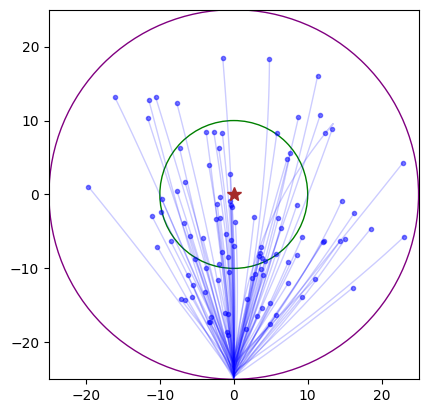

In [48]:
print('Test')
monkey_landing_in_ff.plot_monkey_landings_in_ff(valid_subset_test, snf.monkey_information, snf.ff_real_position_sorted)
print('Control')
monkey_landing_in_ff.plot_monkey_landings_in_ff(valid_subset_control, snf.monkey_information, snf.ff_real_position_sorted)

#### together

In [42]:
plot_path_to_landing = True
ax = monkey_landing_in_ff.plot_monkey_landings_in_ff(valid_subset_test, snf.monkey_information, snf.ff_real_position_sorted, show_plot=False,
                                                     color='red', plot_path_to_landing=plot_path_to_landing)
ax = monkey_landing_in_ff.plot_monkey_landings_in_ff(valid_subset_control, snf.monkey_information, snf.ff_real_position_sorted, show_plot=False,
                                                     ax=ax, color='blue', plot_path_to_landing=plot_path_to_landing)

ax.legend()
plt.show()

/var/folders/81/249hbjx960s5t_1dxgdxz6r00000gn/T/ipykernel_51771/3134628921.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


### plot

56 out of 1213 are not within 25 cm of ff center, which is 4.62%. These are excluded


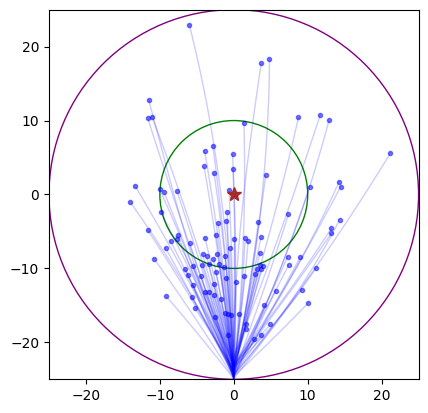

In [51]:
valid_subset = monkey_landing_in_ff.get_valid_subset_to_construct_scatter_around_target_df(snf.closest_stop_to_capture_df, snf.monkey_information, snf.ff_real_position_sorted)
monkey_landing_in_ff.plot_monkey_landings_in_ff(valid_subset, snf.monkey_information, snf.ff_real_position_sorted)

### scatteredness

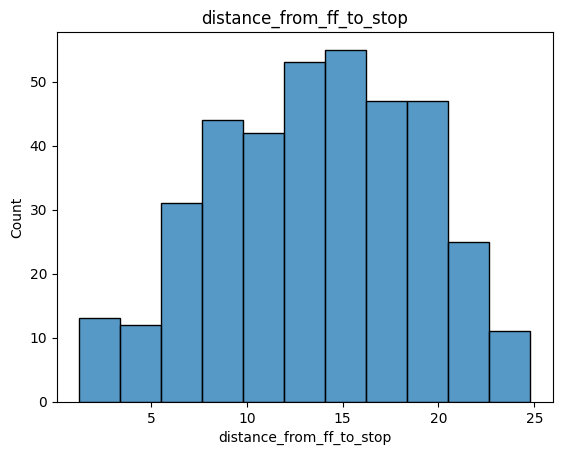

In [9]:
sns.histplot(valid_subset['distance_from_ff_to_stop'])
plt.title('distance_from_ff_to_stop')
plt.show()

quad: 1, num_points: 90


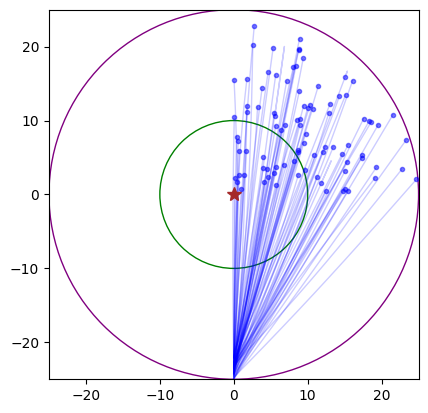

quad: 2, num_points: 84


quad: 3, num_points: 95


quad: 4, num_points: 111


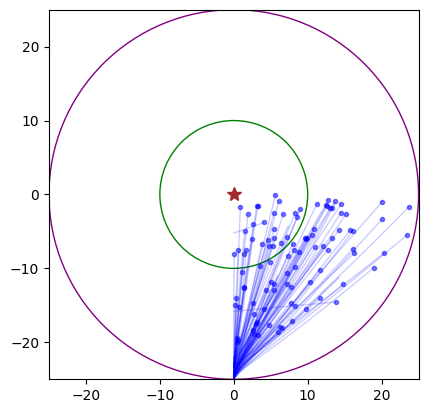

In [46]:
# plot the points in the four quadrants
quadrants = {1: [-90, 0], 2: [0, 90], 3: [90, 180], 4: [-180, -90]}
for quad in range(1, 5):
    valid_subset2 = valid_subset[(valid_subset['angle_in_degrees_from_ff_to_stop'] >= quadrants[quad][0]) & (valid_subset['angle_in_degrees_from_ff_to_stop'] < quadrants[quad][1])].copy()
    print(f'quad: {quad}, num_points: {len(valid_subset2)}')
    monkey_landing_in_ff.plot_monkey_landings_in_ff(valid_subset2, snf.monkey_information, snf.ff_real_position_sorted)

### how far is the monkey from the edge of ff

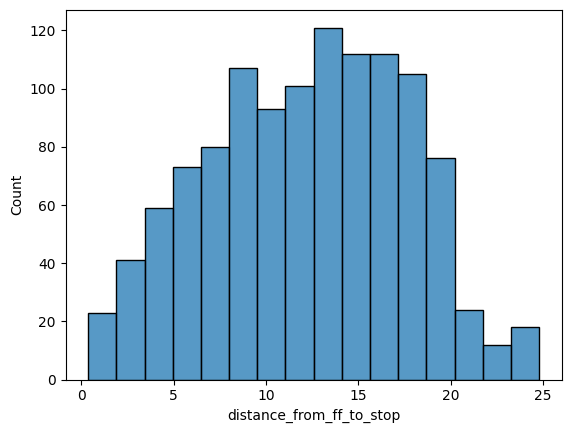

In [56]:
sns.histplot(valid_subset['distance_from_ff_to_stop'])
plt.show()
plt.close()

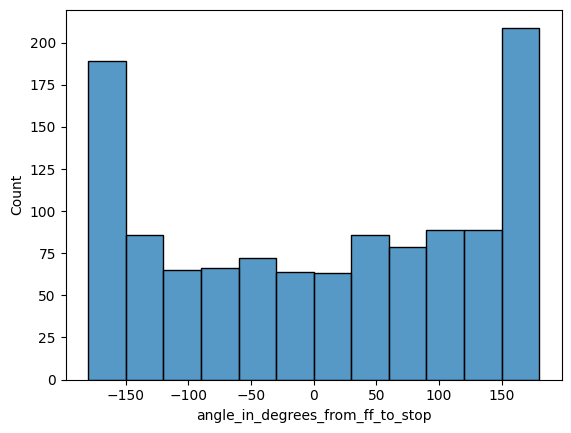

In [54]:
sns.histplot(valid_subset['angle_in_degrees_from_ff_to_stop'])
plt.show()
plt.close()

In [55]:
# Not sure what following plots achieved
df = valid_subset
# plot distance against angle_in_degrees
sns.scatterplot(data=df, x='distance_from_ff_to_stop', y='angle_in_degrees_from_ff_to_stop')
# plot a regression line
sns.regplot(data=df, x='distance_from_ff_to_stop', y='angle_in_degrees_from_ff_to_stop', scatter=False)
plt.show()
plt.close()

# plot distance against abs_angle_in_degrees
sns.scatterplot(data=df, x='distance_from_ff_to_stop', y='abs_angle_in_degrees')
# plot a regression line
sns.regplot(data=df, x='distance_from_ff_to_stop', y='abs_angle_in_degrees', scatter=False)
plt.show()


## null arc


In [3]:
normalize = False
eliminate_outliers = False
use_curv_to_ff_center = False
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 0]
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

#data_item_info = find_cvn_utils.extract_key_info_from_data_item_for_stops_near_ff_class(data_item)

snf = cvn_from_ref_class.CurVsNxtFfFromRefClass(raw_data_folder_path=raw_data_folder_path)
snf.get_more_monkey_data()
snf.traj_curv_descr = 'Traj Curv: From Current Point to Right Before Stop'

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0328/ff_dataframe.h5


In [ ]:
# snf.update_opt_arc_type('opt_arc_stop_closest')
# # options are: norm_opt_arc, opt_arc_stop_first_vis_bdry, opt_arc_stop_closest

Removed 0 rows out of 728 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 728 rows
Retrieving shared_stops_near_ff_df succeeded
[Note] When calling modify_position_of_ff_with_big_angle_for_finding_null_arc, Even with `remove_i_o_modify_rows_with_big_ff_angles=True`, some rows may still be removed (e.g., negative ff_y_relative). Use this function mainly for curvature calculation.
[Warning] 4.534% of ff_x_relative > ff_y_relative. Will be modified instead.
[Note] When calling modify_position_of_ff_with_big_angle_for_finding_null_arc, Even with `remove_i_o_modify_rows_with_big_ff_angles=True`, some rows may still be removed (e.g., negative ff_y_relative). Use this function mainly for curvature calculation.
[Warning] 0.252% of ff_x_relative > ff_y_relative. Will be modified instead.
Successfully retrieved diff_in_curv_df from all_monkey_data/planning/monkey_Bruno/data_0328/diff_in_curv_df/opt_arc_stop_closest/test/dist_-150_w

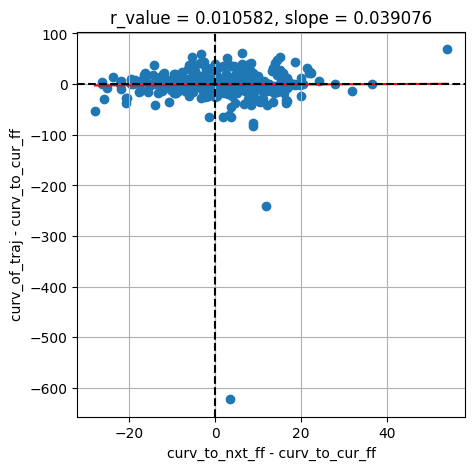

In [4]:
snf.streamline_organizing_info(ref_point_mode='distance', ref_point_value=-150, 
                              #ref_point_mode='time after cur ff visible', ref_point_value=0.1, 
                               curv_of_traj_mode=curv_of_traj_mode, window_for_curv_of_traj=window_for_curv_of_traj, truncate_curv_of_traj_by_time_of_capture=True,
                               use_curv_to_ff_center=use_curv_to_ff_center,  eliminate_outliers=eliminate_outliers,
                               stops_near_ff_df_exists_ok=True,
                               )

snf.ax_for_corr = snf.find_relationships_from_info(normalize=normalize, show_plot=True)
snf.prepare_to_plot_stops_near_ff()


In [68]:
snf.prepare_to_plot_stops_near_ff()

In [14]:
examine_null_arcs.plot_null_arc_ends_in_ff(snf.cur_null_arc_info_for_counted_points, snf.ff_real_position_sorted)

In [15]:
examine_null_arcs.plot_null_arc_ends_in_ff(snf.cur_null_arc_info_for_counted_points, snf.ff_real_position_sorted,
                                               include_arc_portion_before_entering_ff=True)

## see a trial

### plot trial

currentTrial: 3 num_trials: 1
duration: [27.520858, 30.912363]


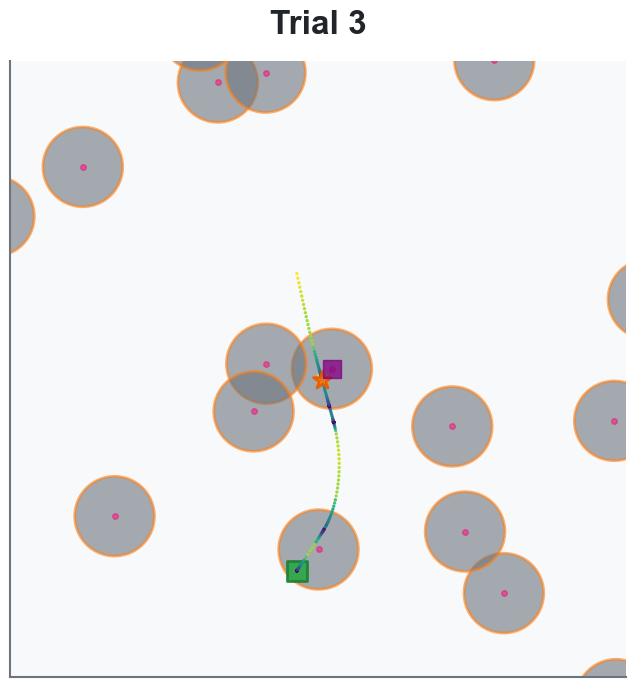

currentTrial: 4 num_trials: 1
duration: [29.912363, 33.701428]


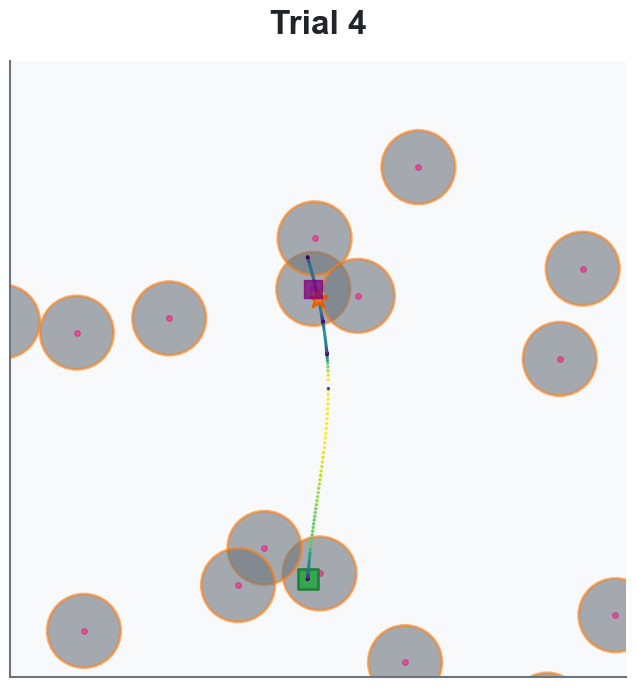

currentTrial: 5 num_trials: 1
duration: [32.701428, 34.631013]


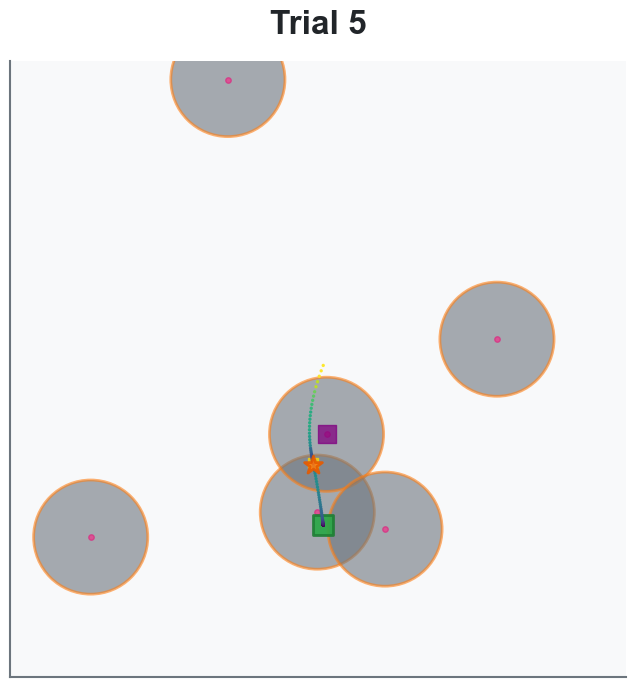

In [63]:
counter = 0
max_plots = 2
for index, row in snf.closest_stop_to_capture_df.iloc[3:].iterrows():
    trial = row['cur_ff_index']
    returned_info = plot_trials.PlotTrials([snf.ff_caught_T_new[trial-1], snf.ff_caught_T_new[trial]+1], 
                snf.monkey_information,
                snf.ff_dataframe, 
                snf.ff_life_sorted, 
                snf.ff_real_position_sorted, 
                snf.ff_believed_position_sorted, 
                None, 
                snf.ff_caught_T_new,
                currentTrial=trial,
                num_trials=1,
                show_believed_target_positions=True,
                show_reward_boundary=True,
                trail_color_var='speed',
                indices_of_ff_to_mark_2nd_kind=[trial],
                point_indices_to_be_marked=row['stop_point_index'],
                #adjust_xy_limits=False,
                )
    plt.show()

    if counter == max_plots:
        break
    counter += 1

### plot interval

currentTrial: 174 num_trials: 1
duration: [434, 435]


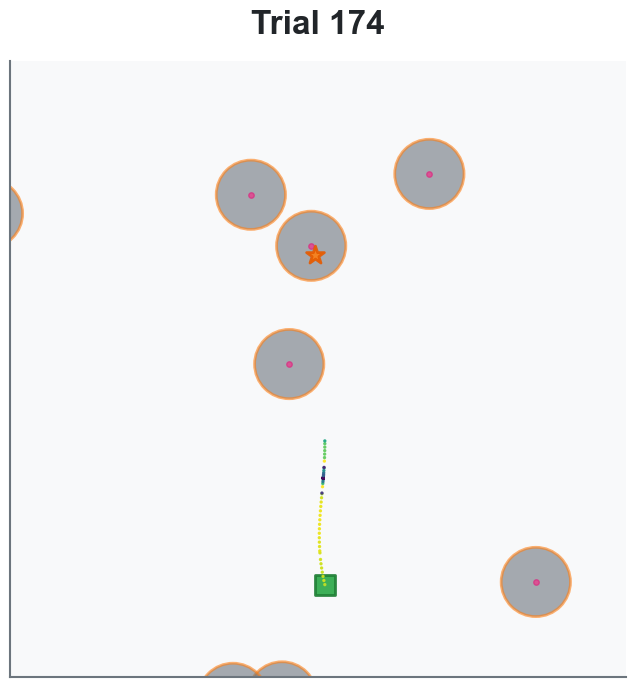

In [64]:
reward_boundary_radius = 25
monkey_sub = monkey_landing_in_ff.iterate_to_get_subset_of_monkey_info(snf.monkey_information, snf.ff_real_position_sorted, int(row.cur_ff_index), row.time, initial_duration_before_stop=2, reward_boundary_radius=reward_boundary_radius)

returned_info = plot_trials.PlotTrials([434, 435], 
               snf.monkey_information,
               snf.ff_dataframe, 
               snf.ff_life_sorted, 
               snf.ff_real_position_sorted, 
               snf.ff_believed_position_sorted, 
               None, 
               snf.ff_caught_T_new,
               None,
               show_believed_target_positions=True,
               show_reward_boundary=True,
               trail_color_var='speed',
               #adjust_xy_limits=False,
               )
plt.show()